Epoch 1/100
9/9 [==============================] - 0s 919us/step - loss: 0.0558
Epoch 2/100
9/9 [==============================] - 0s 854us/step - loss: 0.0249
Epoch 3/100
1/9 [==>...........................] - ETA: 0s - loss: 0.0154

2023-10-23 01:43:49.102507: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


9/9 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 4/100
9/9 [==============================] - 0s 565us/step - loss: 0.0084
Epoch 5/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 6/100
9/9 [==============================] - 0s 633us/step - loss: 0.0055
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 8/100
9/9 [==============================] - 0s 598us/step - loss: 0.0045
Epoch 9/100
9/9 [==============================] - 0s 935us/step - loss: 0.0042
Epoch 10/100
9/9 [==============================] - 0s 590us/step - loss: 0.0039
Epoch 11/100
9/9 [==============================] - 0s 824us/step - loss: 0.0037
Epoch 12/100
9/9 [==============================] - 0s 678us/step - loss: 0.0035
Epoch 13/100
9/9 [==============================] - 0s 960us/step - loss: 0.0034
Epoch 14/100
9/9 [==============================] - 0s 567us/step - loss: 0.0032
Epoch 15/100
9/9 [==============================] - 0

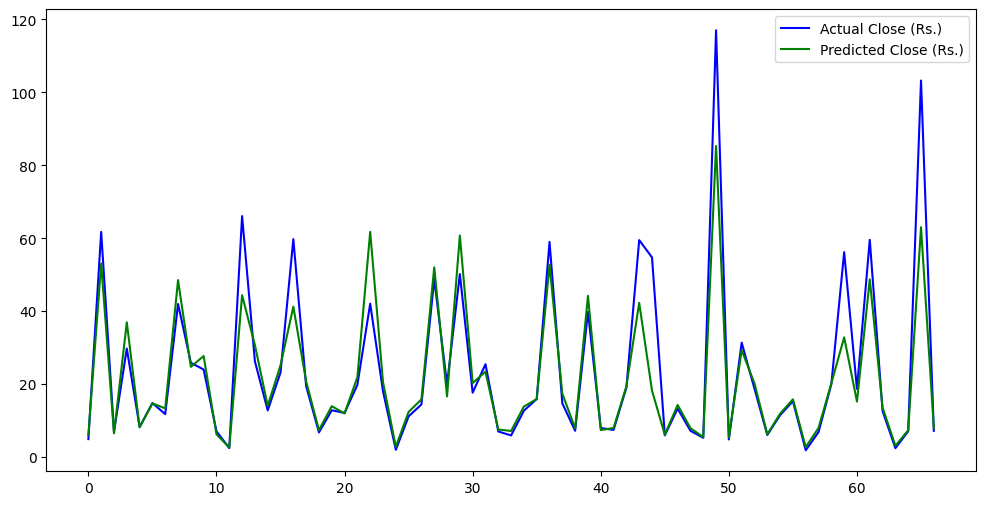

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from sklearn.metrics import mean_squared_error

# Specify the label you want to select
selected_label = 'BOGA.N0000'

# Replace 'your_data.csv' with your dataset file path
final_result = pd.read_csv('./all_data.csv')
final_result = final_result.loc[final_result['Label'] == selected_label]
data = final_result[['Close (Rs.)']]  # Change this to the column you want to use for prediction

# Normalize the data (scaling between 0 and 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Define the sequence length (number of past time steps to consider)
sequence_length = 10  # Adjust this value as needed

# Create sequences of data for input and output
X = []
y = []

for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i + sequence_length, 0])
    y.append(scaled_data[i + sequence_length, 0])

X, y = np.array(X), np.array(y)

# Reshape X to match the model's input requirements
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions for the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Reshape the test data for plotting
y_test_reshaped = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Visualize the actual and predicted 'Close (Rs.)' values
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_test_reshaped)), y_test_reshaped, label='Actual Close (Rs.)', color='blue')
plt.plot(np.arange(len(predictions)), predictions, label='Predicted Close (Rs.)', color='green')
plt.legend()
plt.show()

Epoch 1/100
9/9 [==============================] - 0s 879us/step - loss: 0.0634
Epoch 2/100
9/9 [==============================] - 0s 919us/step - loss: 0.0147
Epoch 3/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 5/100
9/9 [==============================] - 0s 697us/step - loss: 0.0044
Epoch 6/100
9/9 [==============================] - 0s 936us/step - loss: 0.0035
Epoch 7/100
9/9 [==============================] - 0s 635us/step - loss: 0.0029
Epoch 8/100
9/9 [==============================] - 0s 828us/step - loss: 0.0023
Epoch 9/100
9/9 [==============================] - 0s 728us/step - loss: 0.0019
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 11/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 12/100
9/9 [==============================] - 0s 634us/step - loss: 0.0016
Epoch 13/100
9/9 [===========================

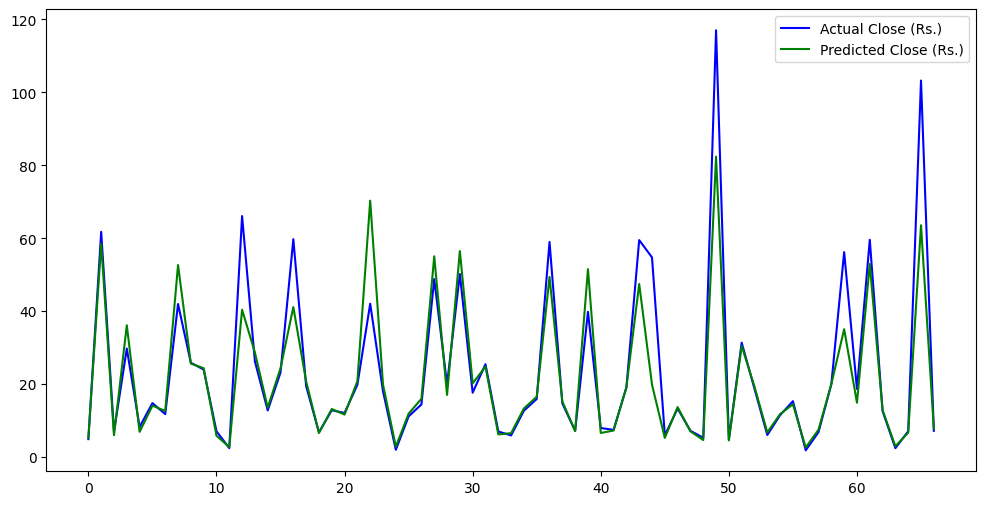

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Specify the label you want to select
selected_label = 'BOGA.N0000'

# Replace 'your_data.csv' with your dataset file path
final_result = pd.read_csv('./all_data.csv')
final_result = final_result.loc[final_result['Label'] == selected_label]
data = final_result[['Close (Rs.)']]  # Change this to the column you want to use for prediction

# Normalize the data (scaling between 0 and 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Define the sequence length (number of past time steps to consider)
sequence_length = 10  # Adjust this value as needed

# Create sequences of data for input and output
X = []
y = []

for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i + sequence_length, 0])
    y.append(scaled_data[i + sequence_length, 0])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the fully connected neural network (FCN) model
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=sequence_length))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions for the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Reshape the test data and predictions for plotting
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1])
y_test_reshaped = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
predictions_reshaped = predictions.flatten()

# Visualize the actual and predicted 'Close (Rs.)' values
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_test_reshaped)), y_test_reshaped, label='Actual Close (Rs.)', color='blue')
plt.plot(np.arange(len(predictions_reshaped)), predictions_reshaped, label='Predicted Close (Rs.)', color='green')
plt.legend()
plt.show()

Epoch 1/100
9/9 [==============================] - 0s 768us/step - loss: 0.0619
Epoch 2/100
9/9 [==============================] - 0s 684us/step - loss: 0.0256
Epoch 3/100
9/9 [==============================] - 0s 664us/step - loss: 0.0113
Epoch 4/100
9/9 [==============================] - 0s 672us/step - loss: 0.0097
Epoch 5/100
9/9 [==============================] - 0s 778us/step - loss: 0.0070
Epoch 6/100
9/9 [==============================] - 0s 627us/step - loss: 0.0058
Epoch 7/100
9/9 [==============================] - 0s 808us/step - loss: 0.0049
Epoch 8/100
9/9 [==============================] - 0s 672us/step - loss: 0.0044
Epoch 9/100
9/9 [==============================] - 0s 684us/step - loss: 0.0040
Epoch 10/100
9/9 [==============================] - 0s 635us/step - loss: 0.0037
Epoch 11/100
9/9 [==============================] - 0s 601us/step - loss: 0.0035
Epoch 12/100
9/9 [==============================] - 0s 682us/step - loss: 0.0034
Epoch 13/100
9/9 [===================

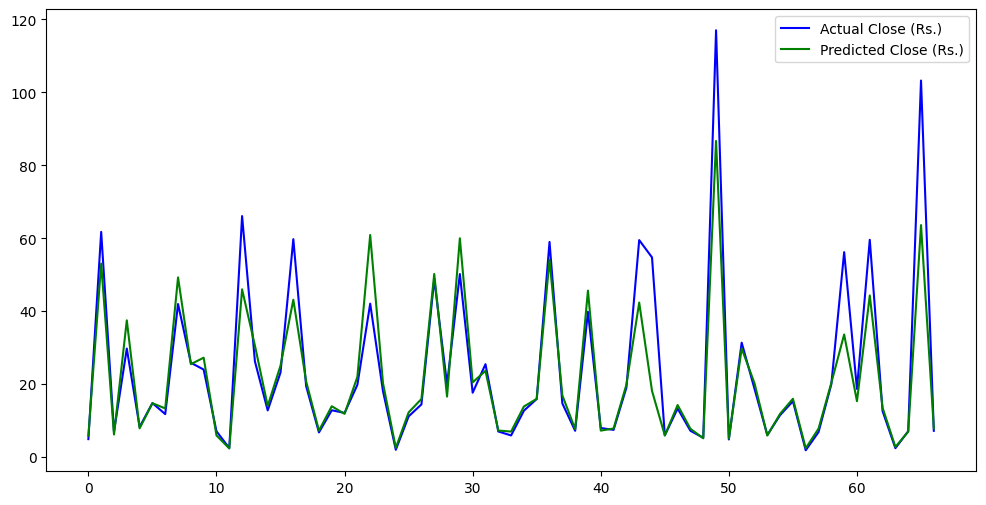

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from sklearn.metrics import mean_squared_error

# Specify the label you want to select
selected_label = 'BOGA.N0000'

# Replace 'your_data.csv' with your dataset file path
final_result = pd.read_csv('./all_data.csv')
final_result = final_result.loc[final_result['Label'] == selected_label]
data = final_result[['Close (Rs.)']]  # Change this to the column you want to use for prediction

# Normalize the data (scaling between 0 and 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Define the sequence length (number of past time steps to consider)
sequence_length = 10  # Adjust this value as needed

# Create sequences of data for input and output
X = []
y = []

for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i + sequence_length, 0])
    y.append(scaled_data[i + sequence_length, 0])

X, y = np.array(X), np.array(y)

# Reshape X to match the model's input requirements
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions for the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Reshape the test data for plotting
y_test_reshaped = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Visualize the actual and predicted 'Close (Rs.)' values
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_test_reshaped)), y_test_reshaped, label='Actual Close (Rs.)', color='blue')
plt.plot(np.arange(len(predictions)), predictions, label='Predicted Close (Rs.)', color='green')
plt.legend()
plt.show()

In [3]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 4.3 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


Epoch 1/100
9/9 [==============================] - 0s 657us/step - loss: 0.0433
Epoch 2/100
9/9 [==============================] - 0s 574us/step - loss: 0.0124
Epoch 3/100
9/9 [==============================] - 0s 690us/step - loss: 0.0089
Epoch 4/100
9/9 [==============================] - 0s 546us/step - loss: 0.0074
Epoch 5/100
9/9 [==============================] - 0s 539us/step - loss: 0.0057
Epoch 6/100
9/9 [==============================] - 0s 653us/step - loss: 0.0052
Epoch 7/100
9/9 [==============================] - 0s 581us/step - loss: 0.0045
Epoch 8/100
9/9 [==============================] - 0s 517us/step - loss: 0.0042
Epoch 9/100
9/9 [==============================] - 0s 855us/step - loss: 0.0039
Epoch 10/100
9/9 [==============================] - 0s 603us/step - loss: 0.0036
Epoch 11/100
9/9 [==============================] - 0s 676us/step - loss: 0.0034
Epoch 12/100
9/9 [==============================] - 0s 598us/step - loss: 0.0032
Epoch 13/100
9/9 [===================

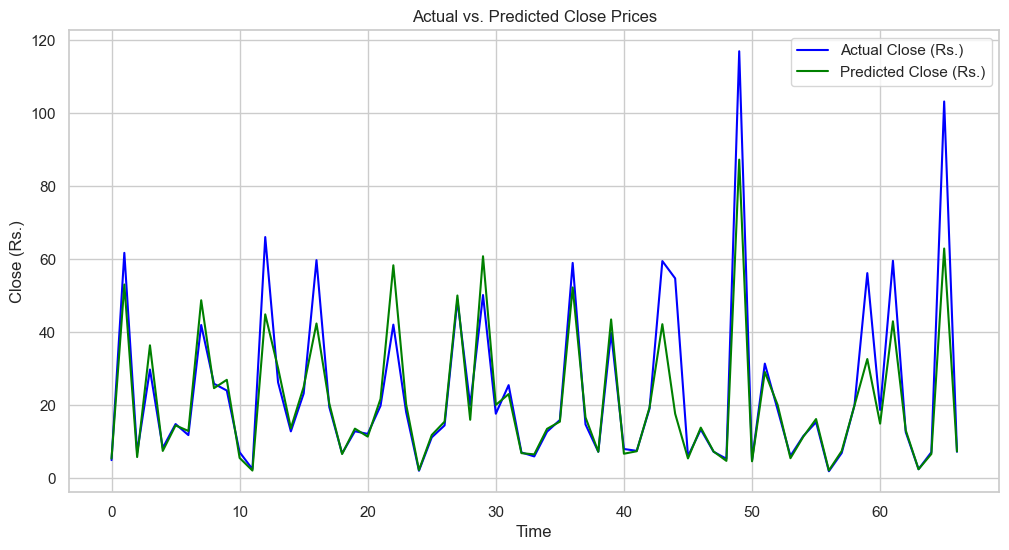

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from sklearn.metrics import mean_squared_error

# Specify the label you want to select
selected_label = 'BOGA.N0000'

# Replace 'your_data.csv' with your dataset file path
final_result = pd.read_csv('./all_data.csv')
final_result = final_result.loc[final_result['Label'] == selected_label]
data = final_result[['Close (Rs.)']]  # Change this to the column you want to use for prediction

# Normalize the data (scaling between 0 and 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Define the sequence length (number of past time steps to consider)
sequence_length = 10  # Adjust this value as needed

# Create sequences of data for input and output
X = []
y = []

for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i + sequence_length, 0])
    y.append(scaled_data[i + sequence_length, 0])

X, y = np.array(X), np.array(y)  # Corrected line

# Reshape X to match the model's input requirements
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions for the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Reshape the test data for plotting
y_test_reshaped = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Use Seaborn for plotting
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(12, 6))  # Set figure size using plt
sns.lineplot(data=y_test_reshaped, label='Actual Close (Rs.)', color='blue')
sns.lineplot(data=predictions.flatten(), label='Predicted Close (Rs.)', color='green')
plt.title('Actual vs. Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close (Rs.)')
plt.legend()
plt.show()
